In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,clear_output
from numpy.polynomial.polynomial import polyfit
import time
from datetime import datetime

In [2]:
#  read file and select YOUR KEYWORD 
sheet_name = "คอนโด"
#  --------------------------------- 

df = pd.read_excel('All Keyword 5 Years.xlsx',sheet_name=sheet_name)  
print("\nAnalysis keyword of {}".format(sheet_name))
start_time = time.time()
dt_object = datetime.fromtimestamp(start_time)
print("starting at :", dt_object)
col_name = df['Keyword']
df = df.drop(columns=['Keyword', 'Avg. monthly searches']).T
df.columns = col_name


Analysis keyword of คอนโด
starting at : 2020-11-27 15:20:22.615380


In [3]:
def compute_overall(keyword):
    flag = False
    sum_value = 0
    count = 0
    for i in df[keyword]:
        if i == 0 and flag == False:
            continue
        else:
            flag = True
            count = count + 1
            sum_value = sum_value + i

    avg_overall = sum_value/count
    # print(avg_overall)

    p25_month = round(count*25/100)
    avg_p25 = df[keyword].tail(p25_month).mean()
    # print(avg_p25)

    trend = round(100*(avg_p25-avg_overall)/avg_overall,2)
    # print(trend)
    return trend

In [4]:
def compute_start(keyword):
    interval = []
    flag = False
    start_rec = []
    for i in range(len(df[keyword])-2):
        x = range(0+i,3+i)
        y = [df[keyword][i], df[keyword][i+1], df[keyword][i+2]]
        try:
            b, m = polyfit(x, y, 1)
        except:
            m = 0
        clear_output(wait = True)
        plt.figure(figsize=(30,10))
        plt.plot(df[keyword],"--", color='#16697a')
        plt.plot(x, y, 'o', color='#db6400')
        plt.plot(x, b + m * x, '--', color='#db6400')
        plt.show()
        if m<0 and flag==False:
            flag = False
        elif m>0 and flag==False: #1st when get positive slope
            flag = True
        elif m>=0 and flag==True: #after pass 1st will save data
            start_rec.append(df.index[i-1])
        else:
            start_rec.append(df.index[i-1])
            start_rec.append(df.index[i])
            flag = False
            interval.append(list(dict.fromkeys(start_rec)))
            start_rec = []
            value = []
    return interval

In [5]:
def compute_down(keyword):
    interval = []
    flag = False
    start_rec = []
    for i in range(len(df[keyword])-2):
        x = range(0+i,3+i)
        y = [df[keyword][i], df[keyword][i+1], df[keyword][i+2]]
        try:
            b, m = polyfit(x, y, 1)
        except:
            m = 0
        clear_output(wait = True)
        plt.figure(figsize=(30,10))
        plt.plot(df[keyword],"--", color='#16697a')
        plt.plot(x, y, 'o', color='#db6400')
        plt.plot(x, b + m * x, '--', color='#db6400')
        plt.show()
        if m>0 and flag==False:
            flag = False
        elif m<0 and flag==False: #1st when get positive slope
            flag = True
        elif m<=0 and flag==True: #after pass 1st will save data
            start_rec.append(df.index[i])
        else:
            start_rec.append(df.index[i-1])
            start_rec.append(df.index[i])
            flag = False
            interval.append(list(dict.fromkeys(start_rec)))
            start_rec = []
    return interval

In [6]:
list(df)[0]

'คอน โด'

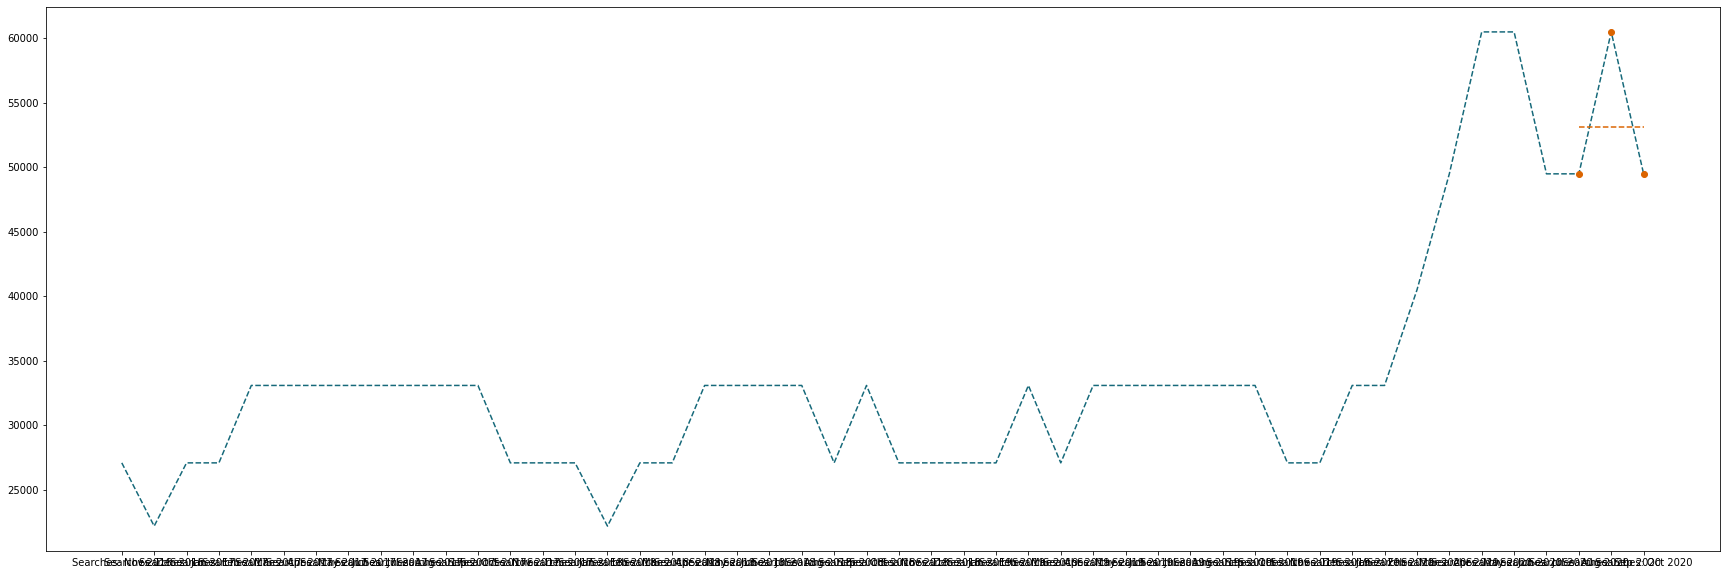

In [19]:
OVERALL_TREND = []
START_UP = []
START_DOWN = []
PEAK_MONTH = []
BOTTOM_MONTH = []
running = 1

keyword = list(df)[0]
trend = compute_overall(keyword)
OVERALL_TREND.append(trend)

interval = compute_start(keyword)
get_index = [len(interval[i]) for i in range(len(interval))]
maxLen = get_index.index(max(get_index))
interval = interval[maxLen]
START_UP.append(interval)

interval_2 = compute_down(keyword)
get_index = [len(interval_2[i]) for i in range(len(interval_2))]
maxLen = get_index.index(max(get_index))
interval_2 = interval_2[maxLen]
START_DOWN.append(interval_2)

PEAK_MONTH.append(df[keyword][1:].idxmax())
BOTTOM_MONTH.append(df[keyword][1:].idxmin())

percent = round(100*running/len(list(df)),2)
print("Process :  {}% ----- {}".format(percent, keyword) , end='\r')
running+=1

In [24]:
start_result = pd.DataFrame()
start_result['v'] = [0,max(df[keyword])]
start_result.index = [interval[0],interval[0]]

In [27]:
end_result = pd.DataFrame()
end_result['v'] = [0,max(df[keyword])]
end_result.index = [interval[-1],interval[-1]]

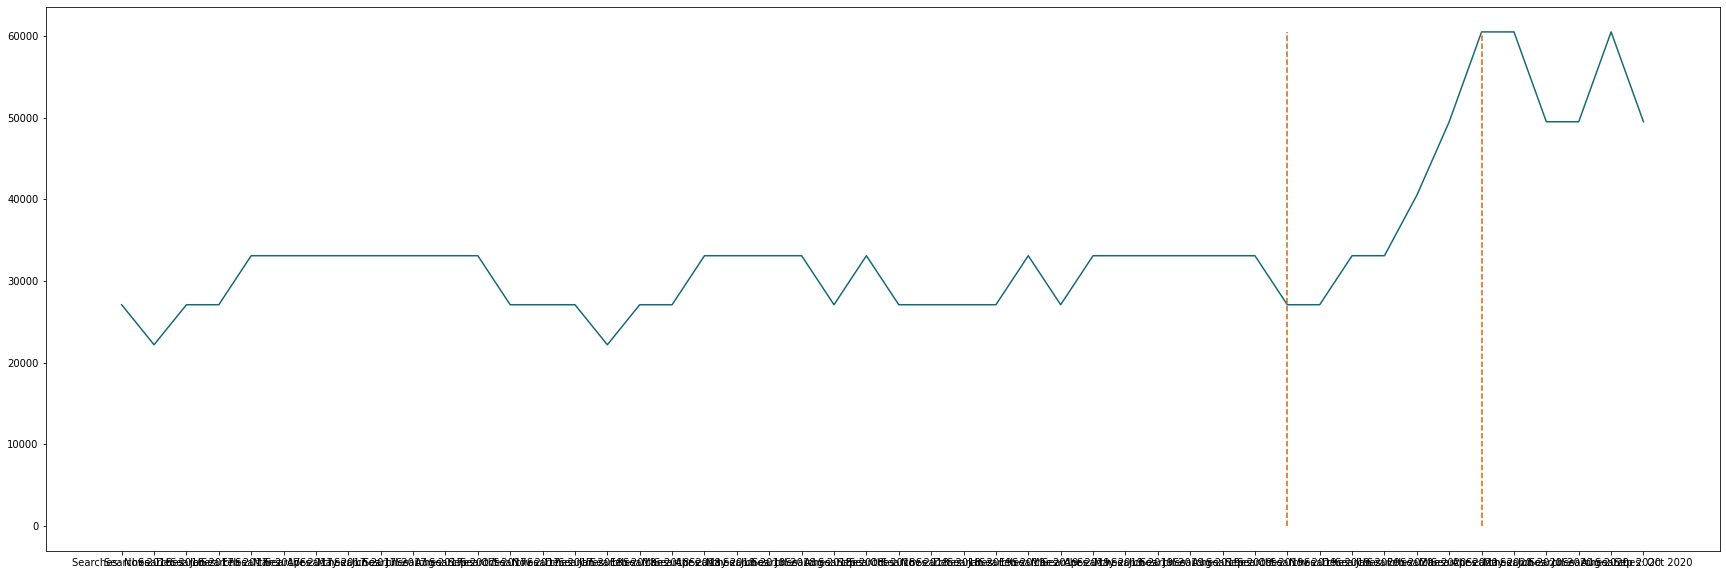

In [28]:
plt.figure(figsize=(30,10))
plt.plot(df[keyword],"-", color='#16697a')
plt.plot(start_result,"--",color='#db6400')
plt.plot(end_result,"--", color='#db6400')
plt.show()